#### Import important libraries 

Importing all the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import the KNNimputer class
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.offline as py
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import graphviz 
from sklearn import tree
from sklearn.metrics import mean_squared_error
import math
from sklearn import datasets, linear_model, metrics

#### Reading dataset with the help of pandas library

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Sagikap/Maritime-accidents-/main/marine_accident.csv', encoding = 'unicode_escape')
df1 = pd.read_csv('https://raw.githubusercontent.com/Sagikap/Maritime-accidents-/main/marine_accident_weather_human.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Sagikap/Maritime-accidents-/main/marine_accident_weather_human_n.csv')
df.head(5)

,Date of occurrence,Occurrence severity,Occurrence with ship(s),Deviation,Name of ship,IMO number,Ship / craft type,Livest lost - Total,People injured - Total,Pollution
0,16/02/2020,Very serious,Grounding/stranding - Drift,NaN,ALTA,7432305,Cargo ship - Solid Cargo - General Cargo,0.0,0.0,NaN
1,4/1/2020,Very serious,Loss of control - Loss of containment,NaN,STONE I,9380582,Cargo ship - Liquid Cargo - Chemical tanker,0.0,0.0,YES
2,27/10/2019,Very serious,"Contact - Floating object - Unknown,Flooding/F...",NaN,Avel vor,8908038,Fishing vessel - Seiner - Tuna purse seiners,0.0,0.0,NaN
3,23/10/2019,Very serious,Grounding/stranding - Power,NaN,DILLON OWEN,9456654,Fishing vessel,0.0,0.0,NaN
4,13/10/2019,Very serious,Grounding/stranding - Power,NaN,RHODANUS,9173173,Cargo ship - Solid Cargo - General Cargo,0.0,0.0,NaN


In [ ]:
df1.head(5)

,Date of occurrence,Occurrence severity,Occurrence with ship(s),IMO number,Ship / craft type,Livest lost - Total,People injured - Total,Pollution,Age On Casualty,Length overall,...,Sea area of occurrence,Wind force,Sea state,Natural light,Visibility,Weather conditions,bad weather,Education,Inappropriate behavior,Equipment
0,2020,1,Grounding/stranding,7432305,General Cargo,0,0,0,44,77.32,...,Open sea - Within EEZ,6.0,6.0,NaN,NaN,NaN,2,NaN,NaN,NaN
1,2020,1,Loss of control,9380582,Tanker,0,0,1,12,184.32,...,Internal waters - Port area,9.0,3.0,Daylight,Poor,Snow,2,NaN,NaN,NaN
2,2019,1,Contact,8908038,Fishing vessel,0,0,0,28,61.00,...,Open sea - Outside EEZ,4.0,4.0,Night,Good,NaN,1,NaN,NaN,1.0
3,2019,1,Grounding/stranding,9456654,Fishing vessel,0,0,0,12,23.20,...,Territorial sea,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
4,2019,1,Grounding/stranding,9173173,General Cargo,0,0,0,22,88.95,...,Territorial sea,3.0,3.0,Night,Good,NaN,0,1.0,1.0,NaN


In [ ]:
df2.head(5)

,Date of occurrence,Occurrence severity,Occurrence with ship(s),IMO number,Ship / craft type,Livest lost - Total,People injured - Total,Pollution,Age On Casualty,Length overall,...,Sea area of occurrence,Wind force,Sea state,Natural light,Visibility,Weather conditions,bad weather,Education,Inappropriate behavior,Equipment
0,2020,1,6,7432305,4,0,0,0,44,77.32,...,Open sea - Within EEZ,6.0,6.0,NaN,NaN,NaN,2,NaN,NaN,NaN
1,2020,1,4,9380582,2,0,0,1,12,184.32,...,Internal waters - Port area,9.0,3.0,Daylight,Poor,Snow,2,NaN,NaN,NaN
2,2019,1,2,8908038,6,0,0,0,28,61.00,...,Open sea - Outside EEZ,4.0,4.0,Night,Good,NaN,1,NaN,NaN,1.0
3,2019,1,6,9456654,6,0,0,0,12,23.20,...,Territorial sea,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
4,2019,1,6,9173173,4,0,0,0,22,88.95,...,Territorial sea,3.0,3.0,Night,Good,NaN,0,1.0,1.0,NaN


#### In our project there is 3 dataset is available we will merge them help of pandas library

In [ ]:
new_df = pd.merge(df,df1, on = 'IMO number').drop(['Deviation'], axis = 1)
new_df1 = pd.merge(new_df,df2, on = 'IMO number')

Dropping the repititive, and usable columns. 
If we fed too much of the columns to the model, The model will overfit and reduce the performance and accuracy. 

In [ ]:
new_df1 = new_df1.drop(['Name of ship', 'Pollution_x', 'Date of occurrence_y', 'Occurrence severity_x', 'Occurrence with ship(s)_y', 'Ship / craft type_y', 'Livest lost - Total_y', 'People injured - Total_y', 'Education_x', 'Inappropriate behavior_x'], axis =1 )
new_df1 = new_df1.drop(['Occurrence severity', 'Occurrence with ship(s)', 'Ship / craft type',
       'Livest lost - Total', 'People injured - Total', 'Pollution',
       'Age On Casualty_y', 'Length overall_y', 'Flag State_y',
       'Sea area of occurrence_y', 'Wind force_x', 'Sea state_y',
       'Weather conditions_y',
       'bad weather_y', 'Education_y', 'Inappropriate behavior_y',
       'Equipment_y', 'Sea state_y'], axis =1 )
new_df1 = new_df1.drop(['Natural light_x', 'Visibility_x', 'Equipment_x', 'IMO number'], axis =1)

Printing the data type of all the columns and the checking the count of NaN values.

In [ ]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date of occurrence_x       246 non-null    object 
 1   Occurrence with ship(s)_x  246 non-null    object 
 2   Ship / craft type_x        246 non-null    object 
 3   Livest lost - Total_x      246 non-null    float64
 4   People injured - Total_x   246 non-null    float64
 5   Occurrence severity_y      246 non-null    int64  
 6   Pollution_y                246 non-null    int64  
 7   Age On Casualty_x          246 non-null    int64  
 8   Length overall_x           246 non-null    float64
 9   Flag State_x               246 non-null    object 
 10  Sea area of occurrence_x   246 non-null    object 
 11  Sea state_x                196 non-null    float64
 12  Weather conditions_x       168 non-null    object 
 13  bad weather_x              246 non-null    int64  

In [ ]:
new_df1.head(6)

,Date of occurrence_x,Occurrence with ship(s)_x,Ship / craft type_x,Livest lost - Total_x,People injured - Total_x,Occurrence severity_y,Pollution_y,Age On Casualty_x,Length overall_x,Flag State_x,Sea area of occurrence_x,Sea state_x,Weather conditions_x,bad weather_x,Date of occurrence,Wind force_y,Natural light_y,Visibility_y
0,16/02/2020,Grounding/stranding - Drift,Cargo ship - Solid Cargo - General Cargo,0.0,0.0,1,0,44,77.32,Greece,Open sea - Within EEZ,6.0,NaN,2,2020,6.0,NaN,NaN
1,4/1/2020,Loss of control - Loss of containment,Cargo ship - Liquid Cargo - Chemical tanker,0.0,0.0,1,1,12,184.32,MARSHALL ISLANDS,Internal waters - Port area,3.0,Snow,2,2020,9.0,Daylight,Poor
2,27/10/2019,"Contact - Floating object - Unknown,Flooding/F...",Fishing vessel - Seiner - Tuna purse seiners,0.0,0.0,1,0,28,61.00,FRANCE,Open sea - Outside EEZ,4.0,NaN,1,2019,4.0,Night,Good
3,23/10/2019,Grounding/stranding - Power,Fishing vessel,0.0,0.0,1,0,12,23.20,IRELAND,Territorial sea,NaN,NaN,1,2019,NaN,NaN,NaN
4,13/10/2019,Grounding/stranding - Power,Cargo ship - Solid Cargo - General Cargo,0.0,0.0,1,0,22,88.95,ANTIGUA AND BARBUDA,Territorial sea,3.0,NaN,0,2019,3.0,Night,Good
5,7/10/2019,Loss of control - Loss of containment,Passenger ship - Passenger and general cargo -...,1.0,3.0,1,0,24,174.50,MALTA,Territorial sea,5.0,Clear,2,2019,8.0,Daylight,Good


As we can see there are certain columns which are in the categorical form but are important for the Data modelling, so we will be converting them to numerical form with the help of Label Encoder.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in range(0,new_df1.shape[1]):
    if new_df1.dtypes[i]=='object':
        new_df1[new_df1.columns[i]] = le.fit_transform(new_df1[new_df1.columns[i]])

We will be replacing the NaN values with the median values.

In [ ]:
new_df1['Sea state_x'].fillna(int(new_df1['Sea state_x'].median()), inplace=True)
new_df1['Wind force_y'].fillna(int(new_df1['Wind force_y'].median()), inplace=True)
new_df1['Weather conditions_x'].fillna(int(new_df1['Weather conditions_x'].median()), inplace=True)
new_df1['Natural light_y'].fillna(int(new_df1['Natural light_y'].median()), inplace=True)
new_df1['Visibility_y'].fillna(int(new_df1['Visibility_y'].median()), inplace=True)


Checking the null Values.

In [ ]:
new_df1.isnull().sum(), new_df1.shape

(Date of occurrence_x         0
 Occurrence with ship(s)_x    0
 Ship / craft type_x          0
 Livest lost - Total_x        0
 People injured - Total_x     0
 Occurrence severity_y        0
 Pollution_y                  0
 Age On Casualty_x            0
 Length overall_x             0
 Flag State_x                 0
 Sea area of occurrence_x     0
 Sea state_x                  0
 Weather conditions_x         0
 bad weather_x                0
 Date of occurrence           0
 Wind force_y                 0
 Natural light_y              0
 Visibility_y                 0
 dtype: int64, (246, 18))

In [ ]:
df = new_df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date of occurrence_x       246 non-null    int64  
 1   Occurrence with ship(s)_x  246 non-null    int64  
 2   Ship / craft type_x        246 non-null    int64  
 3   Livest lost - Total_x      246 non-null    float64
 4   People injured - Total_x   246 non-null    float64
 5   Occurrence severity_y      246 non-null    int64  
 6   Pollution_y                246 non-null    int64  
 7   Age On Casualty_x          246 non-null    int64  
 8   Length overall_x           246 non-null    float64
 9   Flag State_x               246 non-null    int64  
 10  Sea area of occurrence_x   246 non-null    int64  
 11  Sea state_x                246 non-null    float64
 12  Weather conditions_x       246 non-null    int64  
 13  bad weather_x              246 non-null    int64  

We will be calculating the correlation of the important variables and showing through heatmap

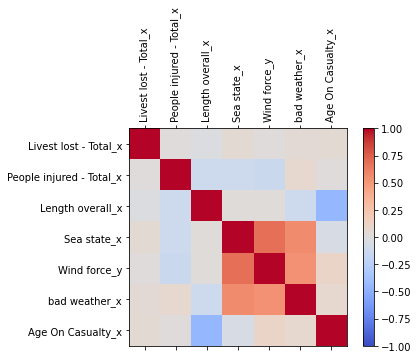

In [ ]:
data = df[['Livest lost - Total_x', 'People injured - Total_x', 'Length overall_x', 'Sea state_x', 'Wind force_y', 'bad weather_x', 'Age On Casualty_x']]
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

#### The correlation method with respect to the merge dataset

In [ ]:
new_df1.corr()

,Date of occurrence_x,Occurrence with ship(s)_x,Ship / craft type_x,Livest lost - Total_x,People injured - Total_x,Occurrence severity_y,Pollution_y,Age On Casualty_x,Length overall_x,Flag State_x,Sea area of occurrence_x,Sea state_x,Weather conditions_x,bad weather_x,Date of occurrence,Wind force_y,Natural light_y,Visibility_y
Date of occurrence_x,1.000000,0.007626,-0.078830,0.045290,0.020672,0.070108,-0.047822,-0.089126,0.096571,-0.027089,-0.065002,-0.091456,-0.065137,-0.003251,-0.065846,-0.029956,0.043440,0.014360
Occurrence with ship(s)_x,0.007626,1.000000,-0.209417,-0.154016,-0.132639,-0.143386,0.096166,-0.056629,-0.071277,-0.048542,-0.073566,0.122768,-0.041126,0.202277,-0.019033,0.149647,0.002384,-0.001938
Ship / craft type_x,-0.078830,-0.209417,1.000000,-0.002105,0.097720,0.157994,-0.071175,0.367331,-0.413832,0.098561,-0.065260,-0.039281,0.226244,0.076784,-0.091697,0.014546,0.053019,0.122327
Livest lost - Total_x,0.045290,-0.154016,-0.002105,1.000000,0.013654,0.242308,-0.067323,0.050497,-0.016687,-0.093932,0.077234,0.050806,0.005326,0.045291,-0.070191,0.011644,-0.008354,-0.027106
People injured - Total_x,0.020672,-0.132639,0.097720,0.013654,1.000000,-0.021858,-0.055824,0.013864,-0.114254,0.032243,-0.104699,-0.112805,-0.082466,0.070824,0.026835,-0.132572,-0.035055,0.024923
Occurrence severity_y,0.070108,-0.143386,0.157994,0.242308,-0.021858,1.000000,0.102041,0.155996,-0.135772,0.062264,0.128326,-0.007707,0.228053,0.056726,-0.018533,0.016669,0.214032,0.182270
Pollution_y,-0.047822,0.096166,-0.071175,-0.067323,-0.055824,0.102041,1.000000,-0.039926,-0.047833,-0.035700,-0.025947,0.104324,0.087669,0.089974,-0.126192,0.073227,-0.057923,-0.020192
Age On Casualty_x,-0.089126,-0.056629,0.367331,0.050497,0.013864,0.155996,-0.039926,1.000000,-0.446861,0.040005,-0.024250,-0.051452,0.177918,0.074275,0.058971,0.114859,0.048966,0.010006
Length overall_x,0.096571,-0.071277,-0.413832,-0.016687,-0.114254,-0.135772,-0.047833,-0.446861,1.000000,-0.063802,0.036888,0.019879,-0.169238,-0.115592,-0.009212,0.019797,-0.095986,-0.058331
Flag State_x,-0.027089,-0.048542,0.098561,-0.093932,0.032243,0.062264,-0.035700,0.040005,-0.063802,1.000000,-0.081770,-0.030086,0.081913,0.025530,0.072231,-0.098765,0.046521,0.014729


Plotting the normal distribution of the numerical columns

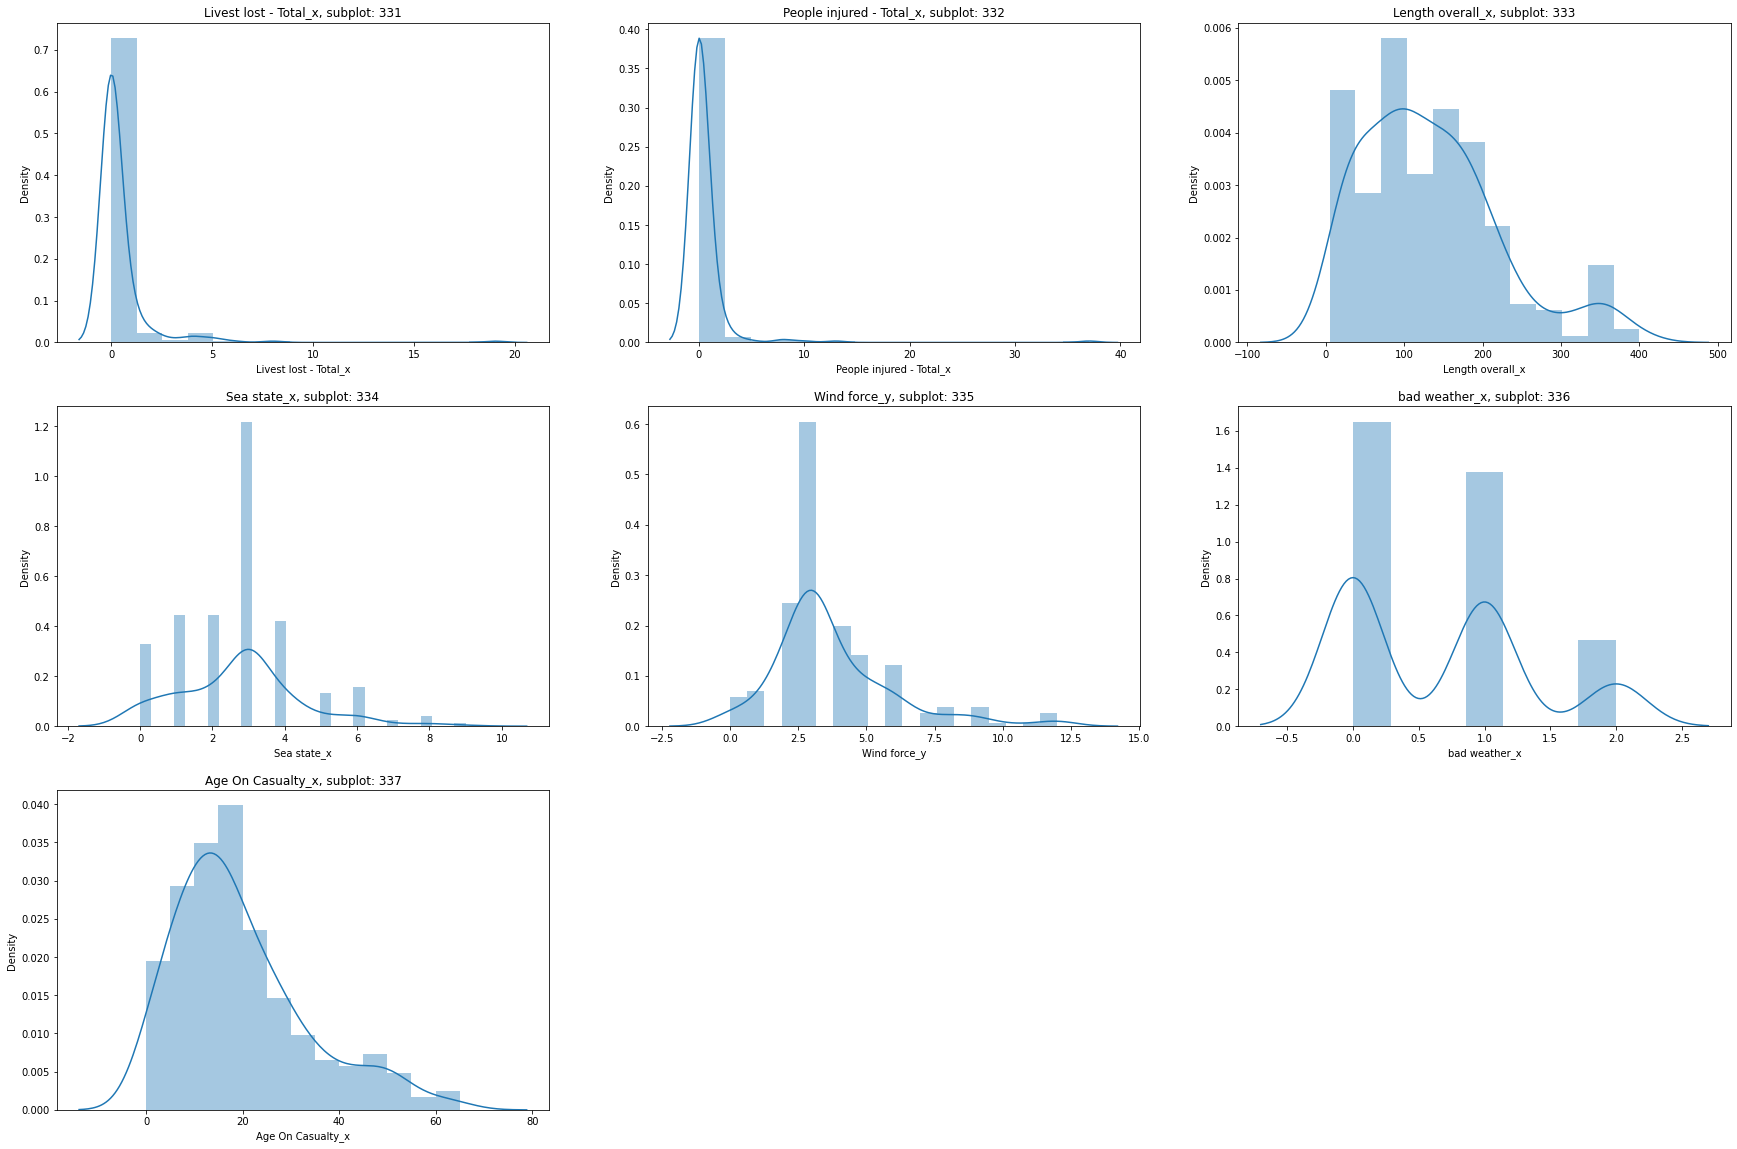

In [ ]:
fig = plt.figure(figsize=(30,20))
a = 3 # number of rows
b = 3 # number of columns
c = 1  # initialize plot counter

for i in data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(data[i])
    c = c + 1

plt.show()

Plotting the frequency of the categorical data in our dataset.

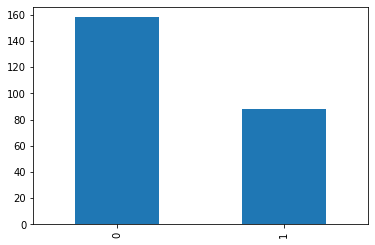

In [ ]:
df['Occurrence severity_y'].value_counts().plot(kind='bar')

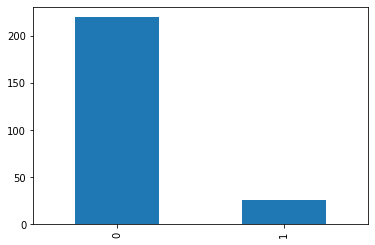

In [ ]:
df['Pollution_y'].value_counts().plot(kind='bar')

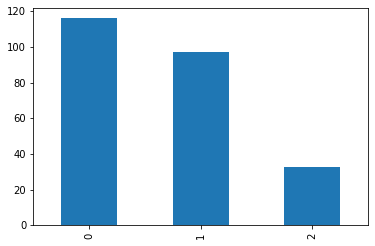

In [ ]:
df['bad weather_x'].value_counts().plot(kind='bar')

Here we are plotting the relation between the numerical variables according to their frequencies of occurence and the movement of one variable along with other variable

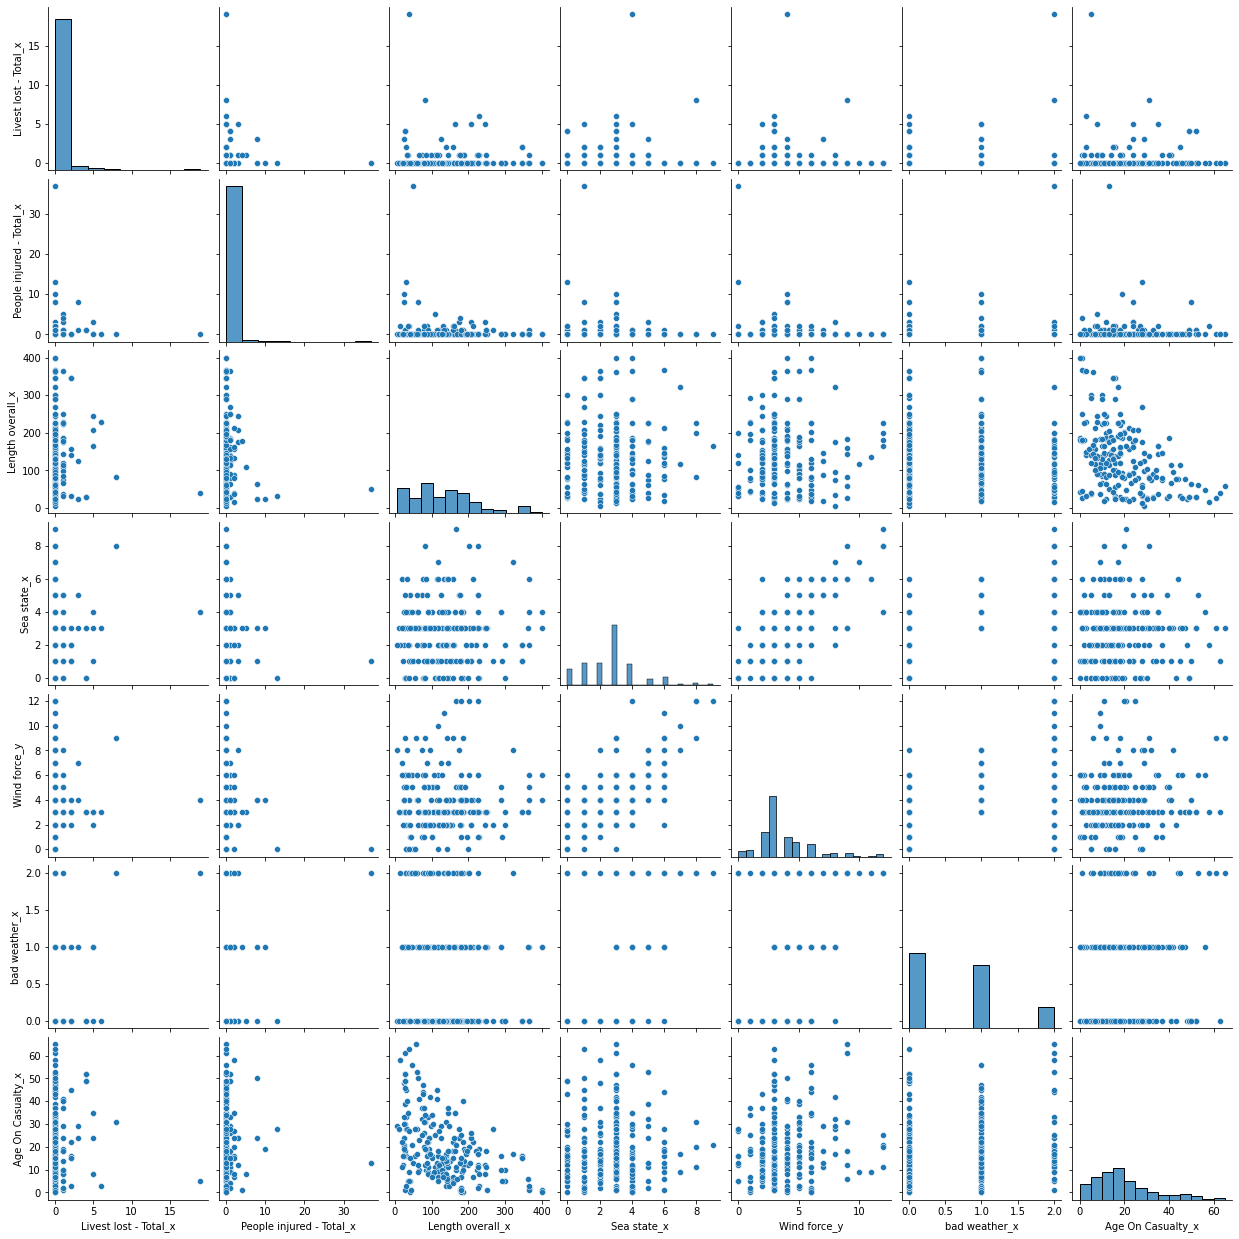

In [ ]:
sns.pairplot(data)
plt.show()

Plotting the box plot to understand the distribution of data.

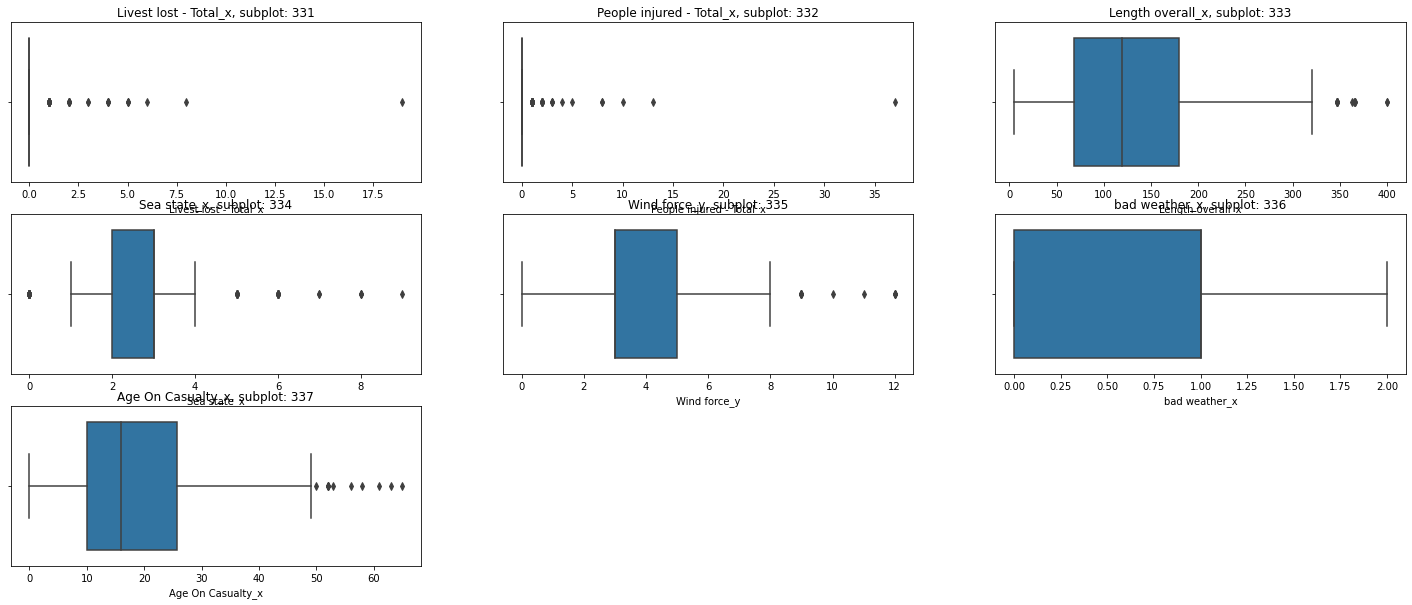

In [ ]:
fig = plt.figure(figsize=(25,10))
a = 3 # number of rows
b = 3 # number of columns
c = 1  # initialize plot counter

for i in data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data[i])
    c = c + 1

plt.show()

Plotting the target variable with the context of other variables.

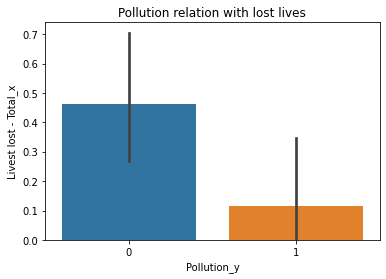

In [ ]:
k=sns.barplot(x='Pollution_y', y='Livest lost - Total_x',data=df).set_title('Pollution relation with lost lives')

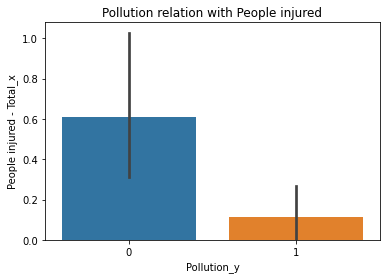

In [ ]:
k=sns.barplot(x='Pollution_y', y='People injured - Total_x', data=df).set_title('Pollution relation with People injured')

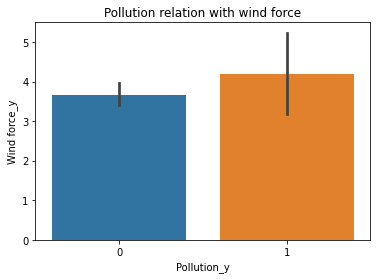

In [ ]:
k=sns.barplot(x='Pollution_y',y='Wind force_y',data=df).set_title('Pollution relation with wind force')

The distribution of Length and wind force in the context of pollution.

In [ ]:
fig = px.scatter(df, x="Length overall_x", y="Wind force_y", color="Pollution_y",
                 title="Distribution of Length and wind force", color_continuous_scale='Bluered_r')
fig.show()

The distribution of Lost lives with people injured in the context of pollution.

In [ ]:
fig = px.scatter(df, x="Livest lost - Total_x", y="People injured - Total_x", color="Pollution_y",
                 title="Distribution of lives lost and people injured", color_continuous_scale='Bluered_r')
fig.show()

In [ ]:
fig = px.scatter(df, x="Age On Casualty_x", y="Occurrence severity_y", color="Pollution_y",
                 title="Distribution of lives lost and people injured", color_continuous_scale='Bluered_r')
fig.show()

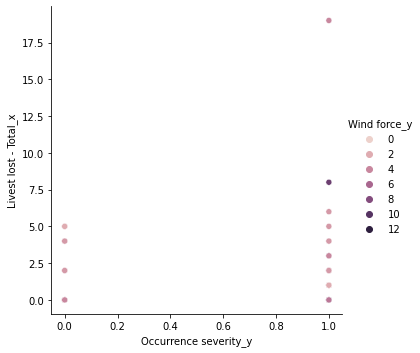

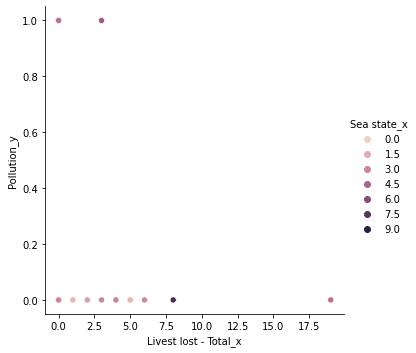

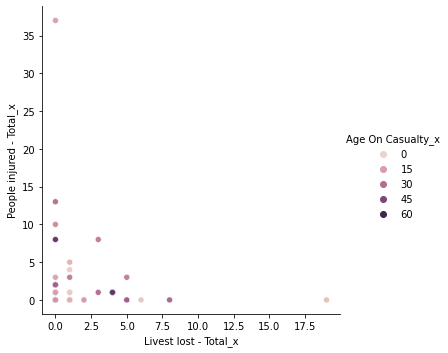

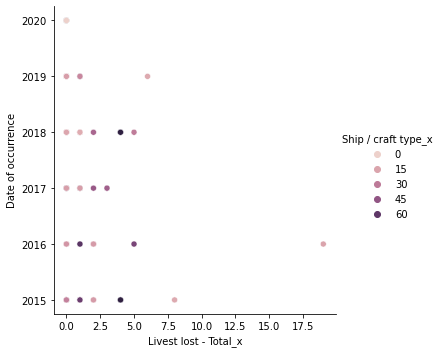

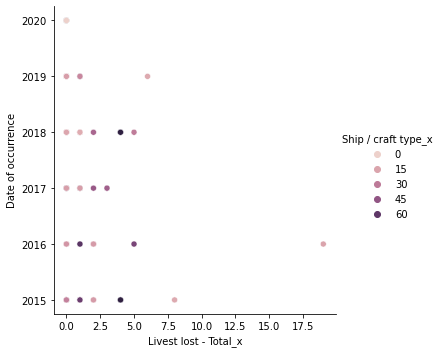

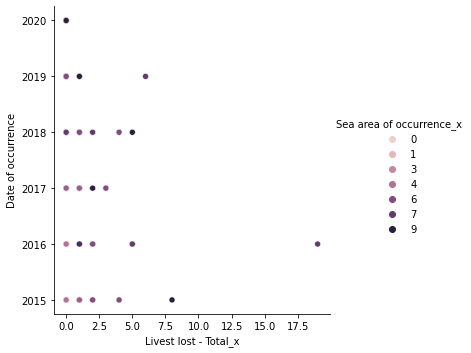

In [ ]:
sns.relplot(x= "Occurrence severity_y", y= "Livest lost - Total_x", hue= "Wind force_y", data=df)
sns.relplot(x= "Livest lost - Total_x", y= "Pollution_y", hue= "Sea state_x", data=df)
sns.relplot(x= "Livest lost - Total_x", y= "People injured - Total_x", hue= "Age On Casualty_x", data=df)
sns.relplot(x= "Livest lost - Total_x", y= "Date of occurrence", hue= "Ship / craft type_x", data=df)
sns.relplot(x= "Livest lost - Total_x", y= "Date of occurrence", hue= "Sea area of occurrence_x", data=df)

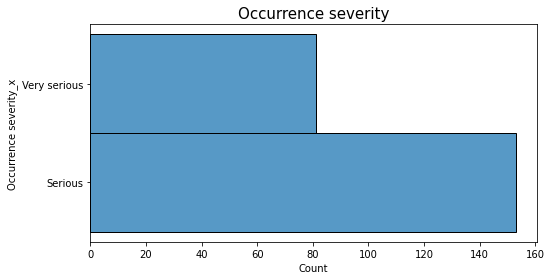

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(y="Occurrence severity_x",data=new_df)
plt.title('Occurrence severity',
         fontsize=15);

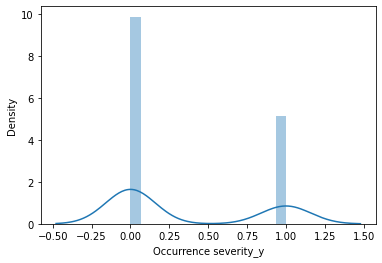

In [ ]:
sns.distplot(new_df["Occurrence severity_y"],bins=15 )

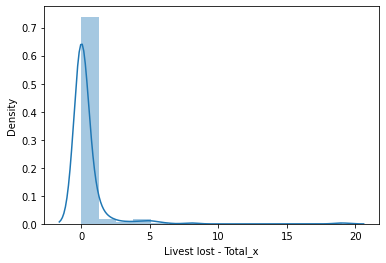

In [ ]:
sns.distplot(new_df["Livest lost - Total_x"],bins=15 )

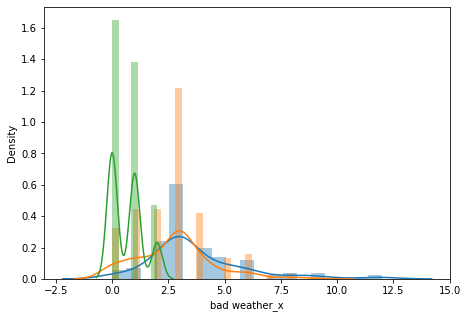

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df['Wind force_y'])
plt.subplot(1,2,2)
sns.distplot(df['Sea state_x'])
plt.subplot(1,2,2)
sns.distplot(df['bad weather_x'])
plt.show()

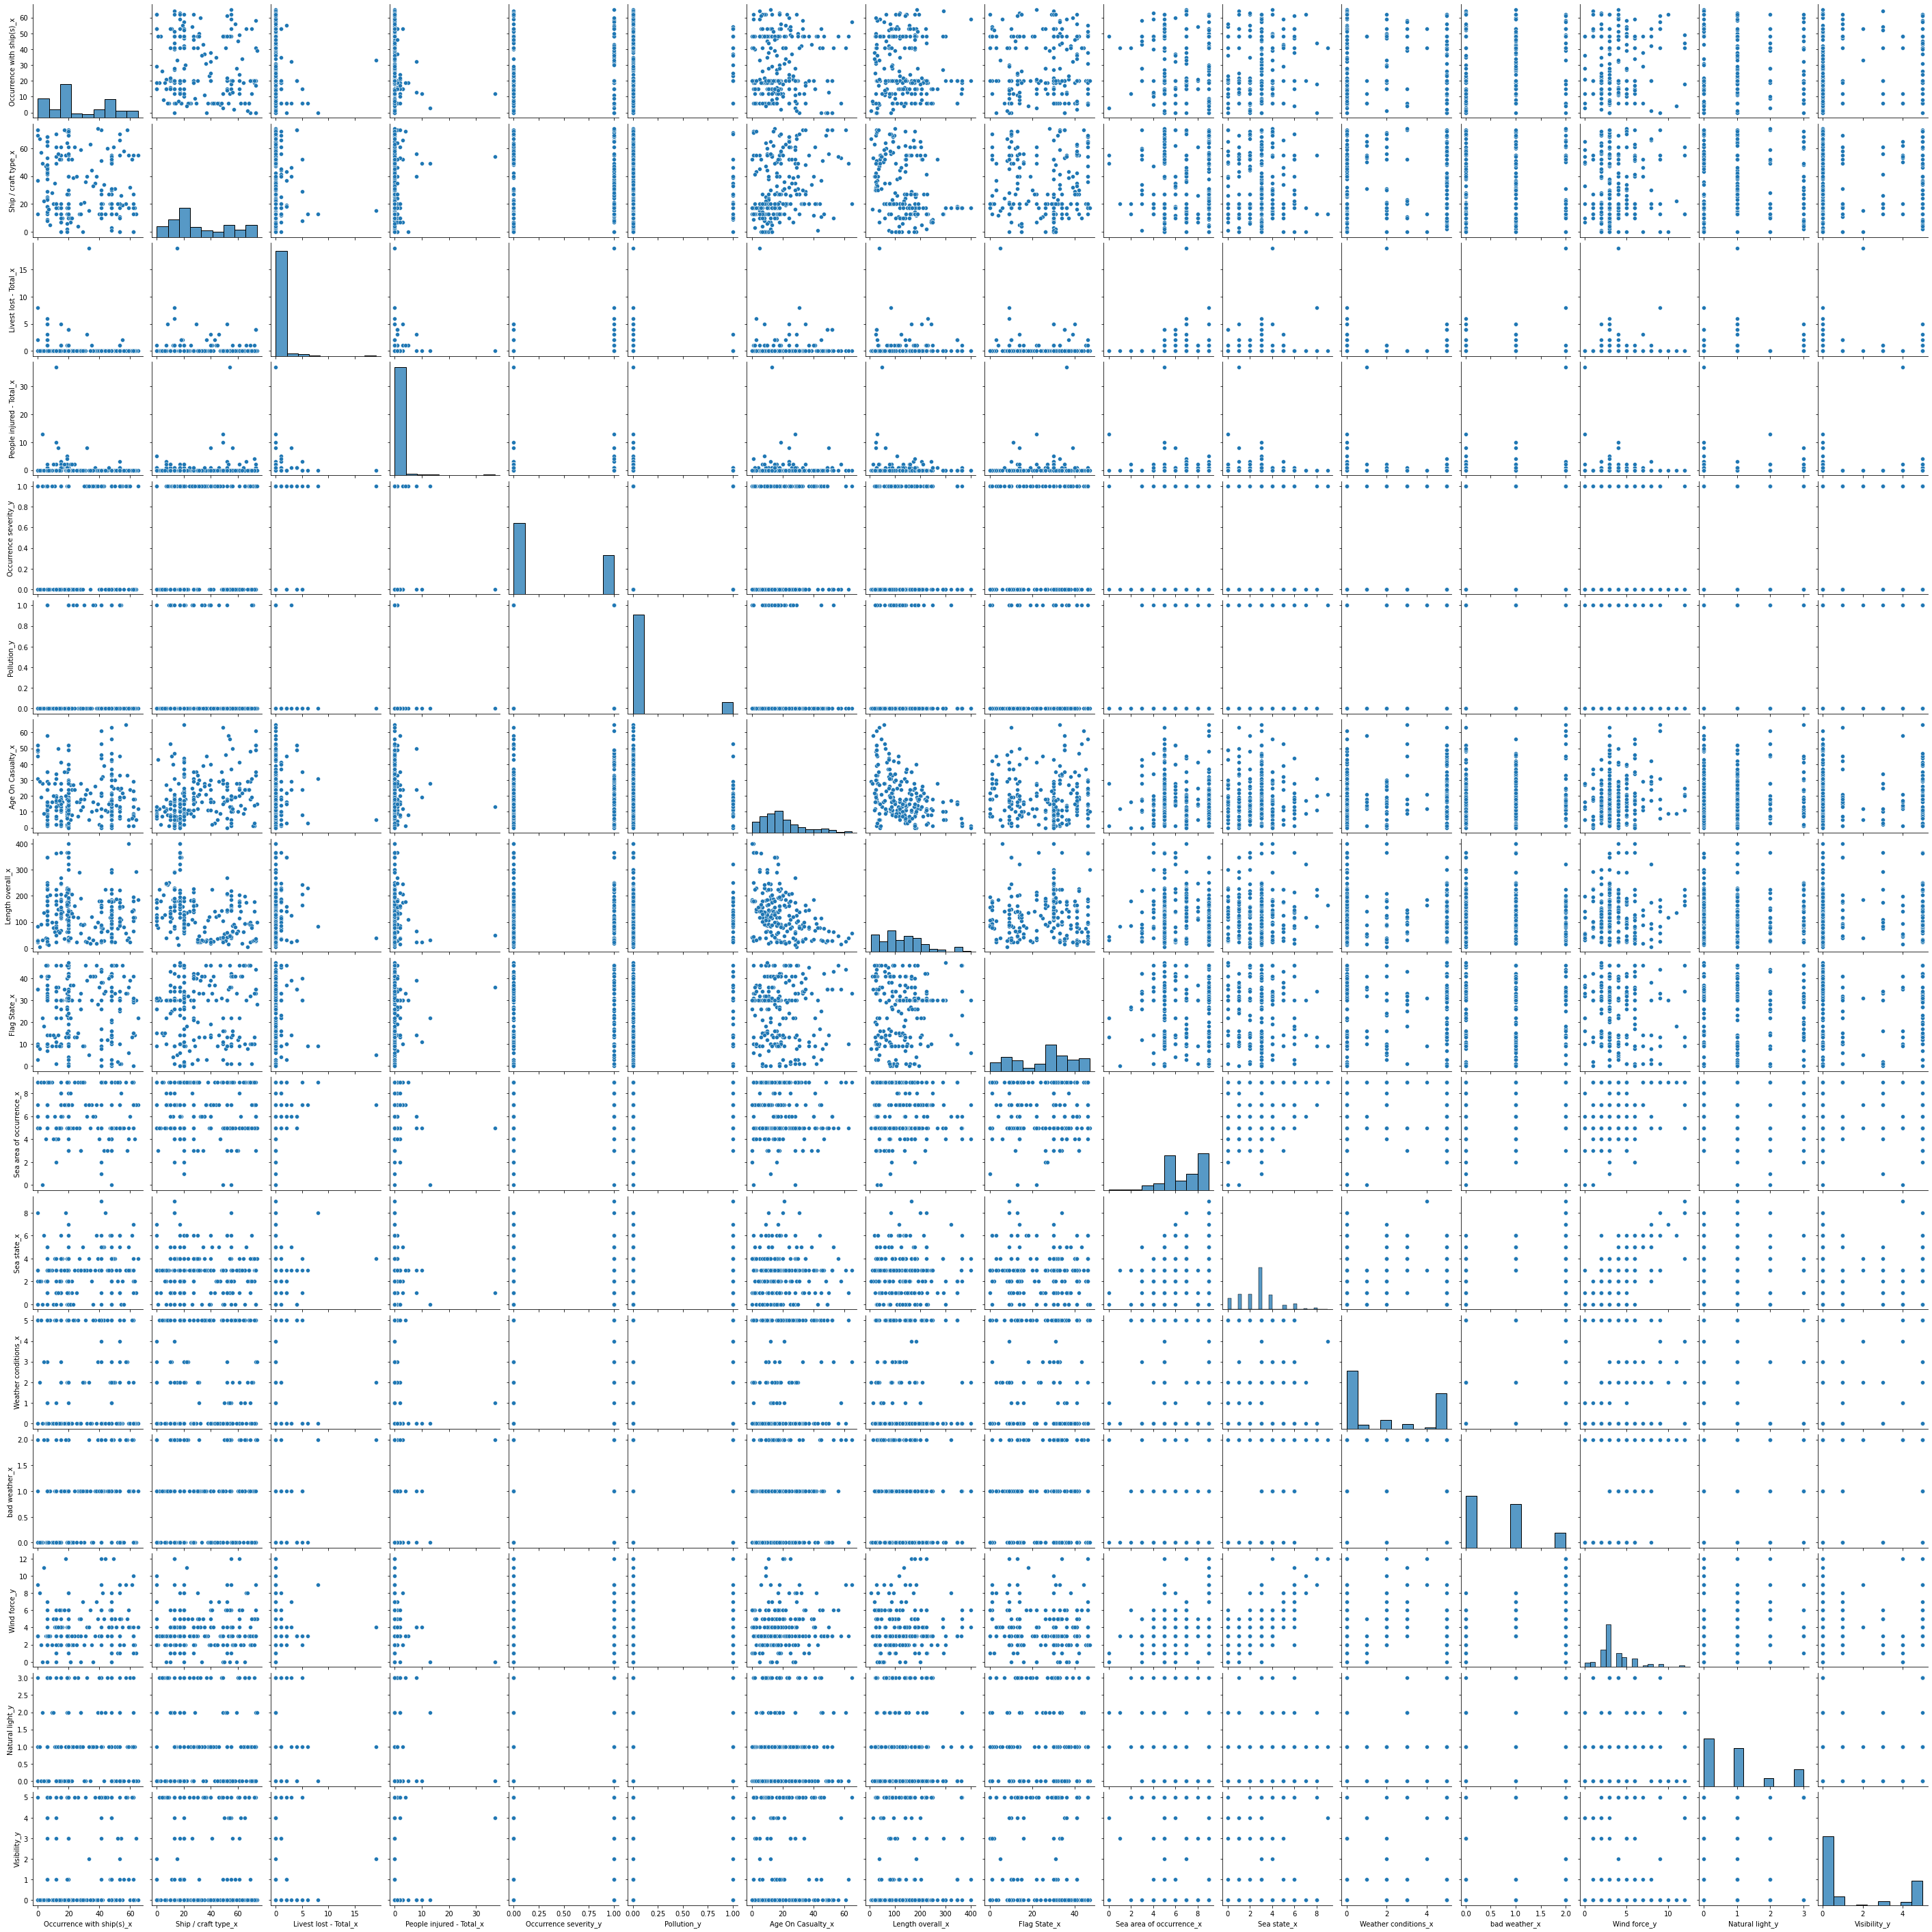

In [ ]:
data = df[['Occurrence with ship(s)_x',	'Ship / craft type_x',	'Livest lost - Total_x',	'People injured - Total_x',	'Occurrence severity_y',	'Pollution_y', 'Age On Casualty_x',	'Length overall_x',	'Flag State_x',	'Sea area of occurrence_x',	'Sea state_x',	'Weather conditions_x',	'bad weather_x',	'Wind force_y',	'Natural light_y',	'Visibility_y']]
sns.pairplot(data)
plt.show()

#### defining the function to plot how the data is distributed percentage wise

In [ ]:
def plot_count(feature, title, new_df1, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(new_df1))
    g = sns.countplot(new_df1[feature], order = new_df1[feature].value_counts().index[:30], palette='winter')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

#### Using the above function and plotting the distribution of Ship / craft type.

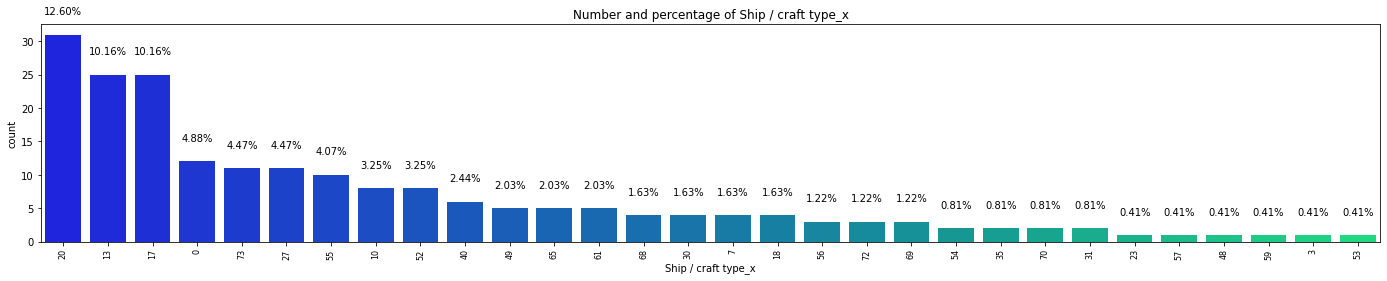

In [ ]:
plot_count("Ship / craft type_x", "Ship / craft type_x", df,6)

Seperating the Target Label from the entire dataset. 

In [ ]:
y = df['Pollution_y']
X=df.drop(['Ship / craft type_x', 'Flag State_x',	'Sea area of occurrence_x', 'Pollution_y'], axis = 1)

In [ ]:

# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
scaler.fit(X)

StandardScaler()

Instantiating the model and seperating the test size and trainig size.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
cl = RandomForestClassifier()
cl = cl.fit(X_train,y_train)
predict = cl.predict(X_test)

#### Classification report of random forest classifier

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        51
           1       0.00      0.00      0.00        11

    accuracy                           0.82        62
   macro avg       0.41      0.50      0.45        62
weighted avg       0.68      0.82      0.74        62



Instantiating K-Nearest Neighbor Classifier

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)
# Predict on dataset which model has not seen before



In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        51
           1       0.00      0.00      0.00        11

    accuracy                           0.81        62
   macro avg       0.41      0.49      0.45        62
weighted avg       0.67      0.81      0.73        62



In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

#### Classification report of Decision Tree

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        51
           1       0.33      0.09      0.14        11

    accuracy                           0.81        62
   macro avg       0.58      0.53      0.52        62
weighted avg       0.74      0.81      0.76        62



#### Accuracy score of Decision tree is calculate

#### Tree is created with the help of graphviz library

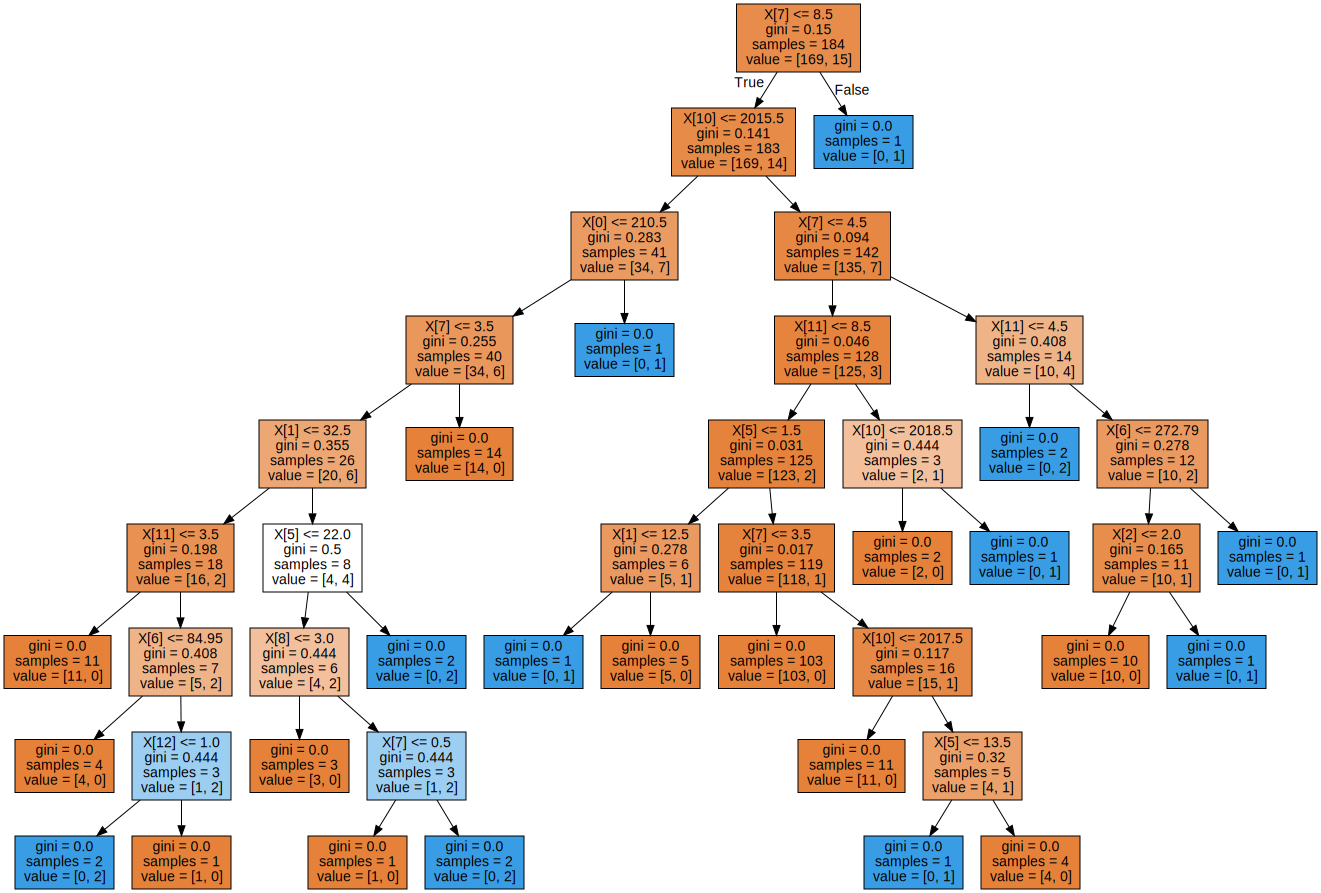

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Seperating the Target Label from the entire dataset for regression implementation

In [ ]:
y = df['Length overall_x']
X=df.drop(['Ship / craft type_x', 'Flag State_x',	'Sea area of occurrence_x', 'Length overall_x'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Instantiating and fitting the model along with their RMSE and regression coefficient.

In [ ]:
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
predict = reg.predict(X_test)
print(predict)
mse = mean_squared_error(y_test, predict)

rmse = math.sqrt(mse)

print('Root mean square for the above predictions are:', rmse)

Coefficients:  [  0.09640134  -0.77981712  -1.40277258  -6.83980355  -4.76618544
  12.1552427   -2.85378061  -5.94575987  -4.48296508 -26.02745025
   1.90479285  11.45121034   0.79095076   3.30460526]
Variance score: 0.04094491974449466
[ 186.44701432  198.44067636  105.1361194   154.83090584  201.58273007
   85.16949386   99.34816233   14.15473915  153.39446098  135.75872877
  132.75246967  159.77202316  144.52350564  172.76029604  148.2562818
  168.16544084  125.40716463  118.72131456 -138.98807069  157.01104598
  180.23313277  123.73418438   77.44531702   58.92713297  132.99429424
  178.9652647   166.55248105   43.25862726   15.59839443   74.67366592
  196.47710372  152.10739096  170.66037546  199.7552476   147.36707436
  118.72131456  129.52461904  103.97676343  117.63421986   18.48417
  186.11665109  107.94214361  183.56666209  190.86965046  118.72131456
  188.42710493  170.03137127  122.5759966    67.78603482  119.22861414
  185.77172923  168.5159007    -0.66244723  134.17255416 

Coefficients:  [  0.09640134  -0.77981712  -1.40277258  -6.83980355  -4.76618544
  12.1552427   -2.85378061  -5.94575987  -4.48296508 -26.02745025
   1.90479285  11.45121034   0.79095076   3.30460526]
Variance score: 0.04094491974449466


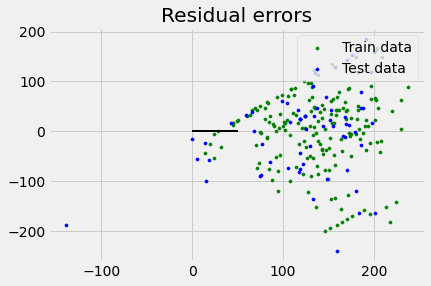

[ 186.44701432  198.44067636  105.1361194   154.83090584  201.58273007
   85.16949386   99.34816233   14.15473915  153.39446098  135.75872877
  132.75246967  159.77202316  144.52350564  172.76029604  148.2562818
  168.16544084  125.40716463  118.72131456 -138.98807069  157.01104598
  180.23313277  123.73418438   77.44531702   58.92713297  132.99429424
  178.9652647   166.55248105   43.25862726   15.59839443   74.67366592
  196.47710372  152.10739096  170.66037546  199.7552476   147.36707436
  118.72131456  129.52461904  103.97676343  117.63421986   18.48417
  186.11665109  107.94214361  183.56666209  190.86965046  118.72131456
  188.42710493  170.03137127  122.5759966    67.78603482  119.22861414
  185.77172923  168.5159007    -0.66244723  134.17255416  176.23904571
  137.61497653  119.19829577  116.75598954   75.30955864    5.86761123
   66.41344637  169.31792996]
Root mean square for the above predictions are: 85.33037536016776


In [ ]:
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
plt.show()

predict = reg.predict(X_test)
print(predict)
mse = mean_squared_error(y_test, predict)

rmse = math.sqrt(mse)

print('Root mean square for the above predictions are:', rmse)